# Sotfmax Distribution

In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import seaborn as sns

try:
    from probml_utils import savefig, latexify
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    from probml_utils import savefig, latexify

In [2]:
latexify(fig_height=1.5)

/home/tensorboy/dev/env/lib/python3.8/site-packages/probml_utils/plotting.py:26: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


In [4]:
def softmax(a):
    e = jnp.exp((1.0 * jnp.array(a)))
    return e / jnp.sum(e)

In [5]:
def plot_softmax_distribution(T, a, save_name, fig=None, axs=None):
    ind = jnp.arange(1, len(a) + 1)
    fig, axs = plt.subplots(
        1,
        len(T),
    )

    for i, ax in enumerate(axs):
        ax.bar(ind, softmax(a / T[i]))

        if i == 0:
            ax.set_ylabel(r"$S(a | T)$")
            ax.set_yticks(jnp.arange(0, 1, 0.2))
        else:
            ax.get_yaxis().set_visible(False)

        ax.set_xlabel("logits (a)")
        ax.set_title(f"T = {T[i]}")
        ax.set_ylim(0, 1)

    sns.despine()
    plt.tight_layout()

    if len(save_name) > 0:
        savefig(save_name)

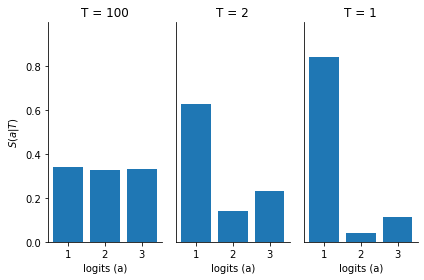

In [6]:
T_array = [100, 2, 1]
a = jnp.array(
    [
        3,
        0,
        1,
    ]
)

plot_softmax_distribution(T_array, a, f"softmax_temp")

### Interactive figure for softmax distribution

In [7]:
from ipywidgets import interact


@interact(T=(1, 100))
def generate_interactinve_graph(T):
    a = jnp.array([3, 0, 1])
    ind = jnp.arange(1, len(a) + 1)

    plt.figure()
    plt.bar(ind, softmax(a / T))
    plt.title(f"T = {T}")
    plt.ylim(0, 1)
    plt.xlabel("logits (a)")
    plt.ylabel("$S(a | T)$")
    sns.despine()

interactive(children=(IntSlider(value=50, description='T', min=1), Output()), _dom_classes=('widget-interact',…